In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib.ticker import FuncFormatter

In [2]:
data = pd.read_csv('Cleaned_Dataset.csv', sep = ',')
data = pd.DataFrame(data)
data

C:\Users\HP\AppData\Local\Temp\ipykernel_25304\901128735.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Cleaned_Dataset.csv', sep = ',')


,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,Prscrbr_Geo_Desc,Brnd_Name,Gnrc_Name,Tot_Prscrbrs,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Benes,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,LIS_Bene_Cst_Shr,NonLIS_Bene_Cst_Shr,Opioid_Drug_Flag,Opioid_LA_Drug_Flag,Antbtc_Drug_Flag,Antpsyct_Drug_Flag
0,National,NaN,National,1st Tier Unifine Pentips,"Pen Needle, Diabetic",691,1613,2874.2,44355.04,699.0,1329.0,2375.6,35803.14,992.77,7093.55,N,N,N,N
1,National,NaN,National,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1167,3269,5592.0,97951.18,1267.0,2567.0,4545.0,76544.14,1899.59,10392.03,N,N,N,N
2,National,NaN,National,Abacavir,Abacavir Sulfate,2617,19634,25152.1,5290175.88,2807.0,11434.0,15353.6,3042569.00,10643.29,152140.95,N,N,N,N
3,National,NaN,National,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,2329,20191,27901.0,9981620.25,2890.0,12609.0,18282.9,6206789.76,14925.90,360305.92,N,N,N,N
4,National,NaN,National,Abilify,Aripiprazole,2111,12096,15928.9,11867897.88,1734.0,3684.0,4897.1,3318969.72,25007.42,178277.87,N,N,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115930,State,9E,Foreign Country,Xigduo Xr,Dapaglifloz Propaned/Metformin,2,17,25.0,11384.92,0.0,0.0,0.0,0.00,17.20,750.44,N,N,N,N
115931,State,9E,Foreign Country,Xtandi,Enzalutamide,1,29,29.0,149316.49,0.0,29.0,29.0,149316.49,0.00,0.00,N,N,N,N
115932,State,9E,Foreign Country,Yuvafem,Estradiol,3,72,142.0,6466.87,20.0,72.0,142.0,6466.87,0.00,1375.86,N,N,N,N
115933,State,9E,Foreign Country,Ziprasidone Hcl,Ziprasidone Hcl,1,31,33.0,3994.67,0.0,0.0,0.0,0.00,33.35,408.01,N,N,N,N


- Top Prescribed Drugs

   Which drugs have the highest number of claims nationally?

   Are brand-name or generic drugs more commonly prescribed?

<function matplotlib.pyplot.show(close=None, block=None)>

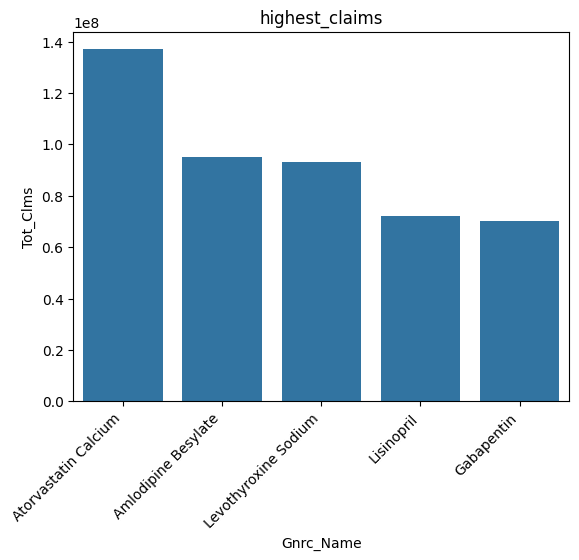

In [9]:
## Group by generic drug name, sum the total claims, then get top 5
highest_claims = data.groupby('Gnrc_Name')['Tot_Clms'].sum().nlargest(5)
sns.barplot(highest_claims)
plt.xticks(rotation=45, ha='right')  # Rotate and align labels
plt.title("highest_claims")
plt.show

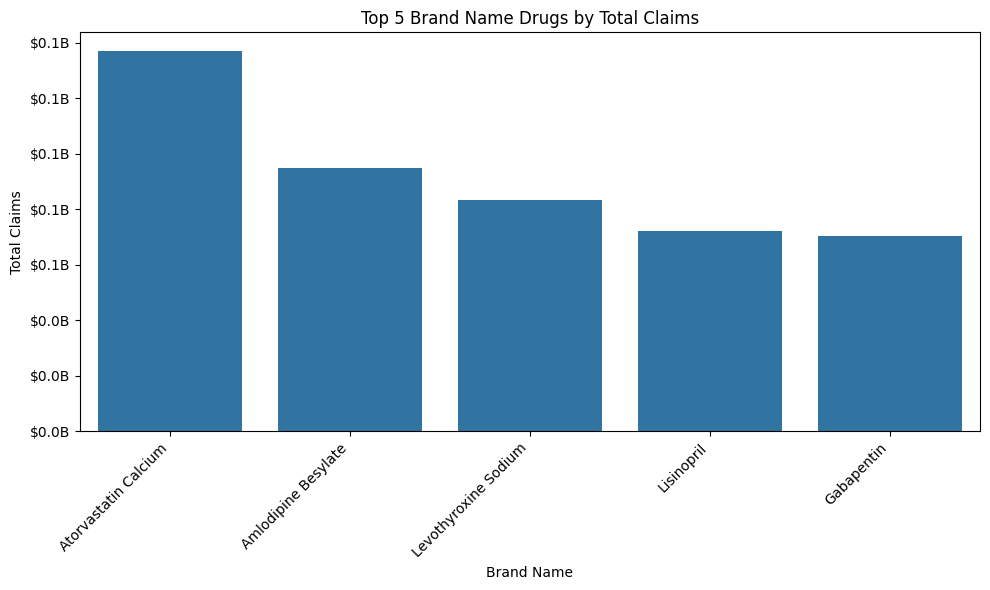

In [ ]:
# Group by brand name and sum claims
highest_brand_names = data.groupby('Brnd_Name')['Tot_Clms'].sum().nlargest(5).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Brnd_Name', y='Tot_Clms', data=highest_brand_names)

plt.xticks(rotation=45, ha='right')
plt.title("Top 5 Brand Name Drugs by Total Claims")
plt.xlabel("Brand Name")
plt.ylabel("Total Claims")
plt.tight_layout()
plt.show()

Drug Cost Analysis

    Which drugs contribute the most to total drug costs?

    Is there a correlation between total claims and total cost?



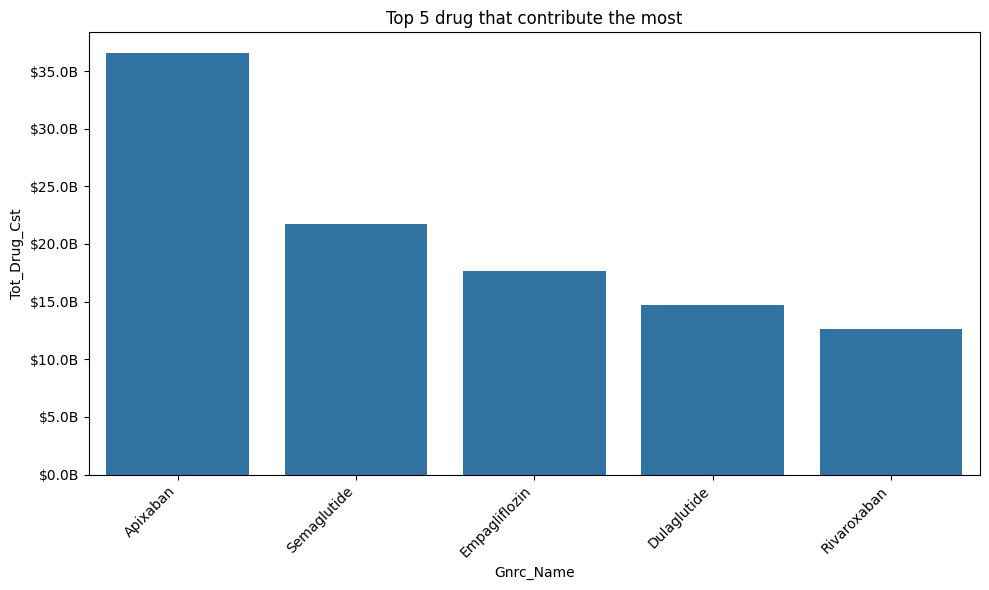

In [24]:
# drug that contribute the most to total drug cost ? 
Total_drug_cost = data.groupby('Gnrc_Name')['Tot_Drug_Cst'].sum().nlargest(5)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(Total_drug_cost)
# Format y-axis (e.g., show in billions)
formatter = FuncFormatter(lambda x, _: f'${x/1e9:.1f}B')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')
plt.title("Top 5 drug that contribute the most")
plt.xlabel("Gnrc_Name")
plt.ylabel("Tot_Drug_Cst")
plt.tight_layout()
plt.show()

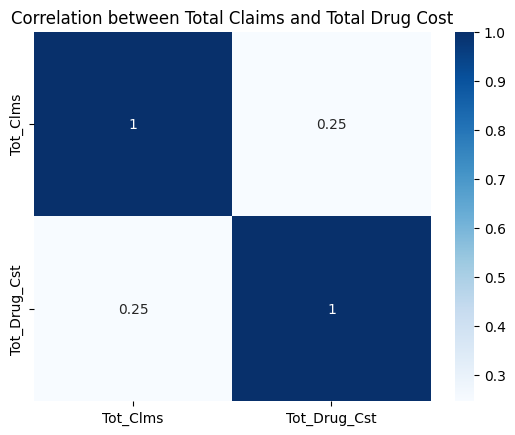

In [27]:
#Is there a correlation between total claims and total cost?

correlation = data[['Tot_Clms','Tot_Drug_Cst']].corr()

sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation between Total Claims and Total Drug Cost')
plt.show()

Opioid and Antipsychotic Use

    How many opioid or antipsychotic drugs are being prescribed?

    Are there any high-cost or high-usage drugs flagged as opioids?

In [30]:
# how many opioid are being prescribed ? 

total_opioid_claims = data.loc[data['Opioid_Drug_Flag'] == 'Y', 'Tot_Clms'].sum()
print(f"Total opioid claims: {total_opioid_claims}")

Total opioid claims: 119307944


In [32]:
# how many Antipsychotic drugs are being prescribed ? 
total_antipsychotic = data.loc[data['Antpsyct_Drug_Flag']=='Y','Tot_Clms'].sum()
print(total_antipsychotic)

57477451


In [35]:
# Filter only opioid drugs
opioid_drugs = data[data['Opioid_Drug_Flag'] == 'Y']

# Find the drug with the highest total cost
highest_cost_opioid = opioid_drugs.sort_values(by='Tot_Drug_Cst', ascending=False).head(1)

print(highest_cost_opioid[['Brnd_Name', 'Gnrc_Name', 'Tot_Drug_Cst']])


                      Brnd_Name                  Gnrc_Name  Tot_Drug_Cst
1442  Hydrocodone-Acetaminophen  Hydrocodone/Acetaminophen  4.229598e+08


In [ ]:
# Filter only opioid drugs 
opioid_drugs = data[data['Opioid_Drug_Flag'] == 'Y']

# Find the drug with the highest total cost
highest_cost_opioid = opioid_drugs.sort_values(by='Tot_Clms', ascending=False).head(1)

print(highest_cost_opioid[['Brnd_Name', 'Gnrc_Name', 'Tot_Clms']])


                      Brnd_Name                  Gnrc_Name  Tot_Clms
1442  Hydrocodone-Acetaminophen  Hydrocodone/Acetaminophen  20015264


Medicare Age 65+ Insights

   What is the distribution of costs and claims for the 65+ population?

   How does drug usage differ between LIS (Low-Income Subsidy) and Non-LIS beneficiaries?



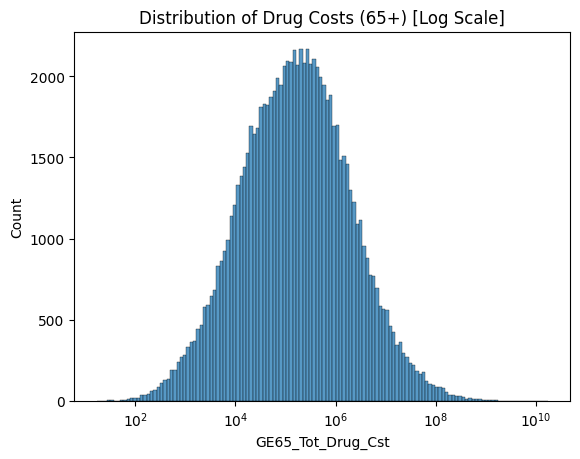

In [4]:
# The distribution of costs and claims for the 65+ population 
sns.histplot(data['GE65_Tot_Drug_Cst'], log_scale=True)
plt.title('Distribution of Drug Costs (65+) [Log Scale]')
plt.show()

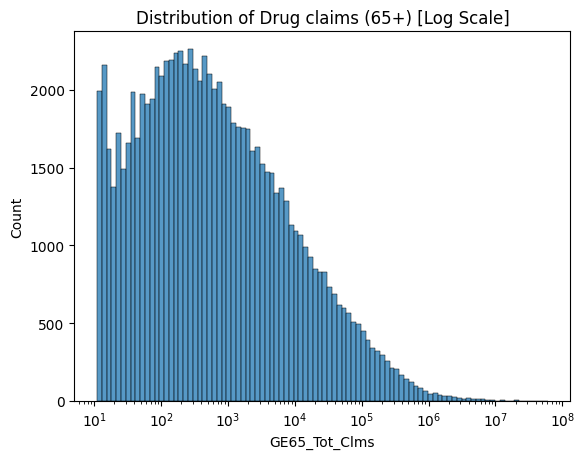

In [6]:
# The distribution of costs and claims for the 65+ population 
sns.histplot(data['GE65_Tot_Clms'], log_scale=True)
plt.title('Distribution of Drug claims (65+) [Log Scale]')
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


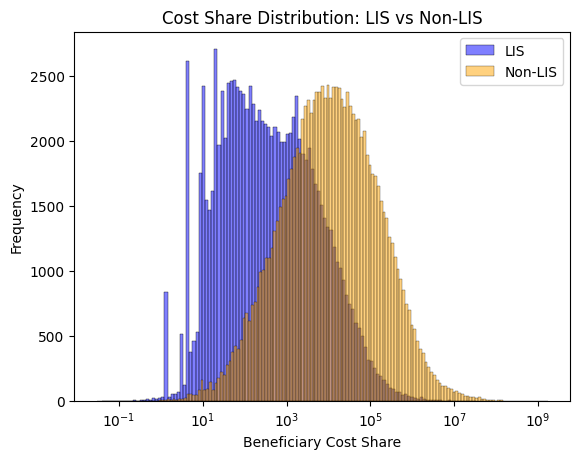

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['LIS_Bene_Cst_Shr'], label='LIS', color='blue', kde=True,log_scale=True)
sns.histplot(data['NonLIS_Bene_Cst_Shr'], label='Non-LIS', color='orange', kde=True,log_scale=True)

plt.legend()
plt.title('Cost Share Distribution: LIS vs Non-LIS')
plt.xlabel('Beneficiary Cost Share')
plt.ylabel('Frequency')
plt.show()